In [1]:
import tensorflow as tf
from tensorflow import keras as ks
import os
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel(r'C:\Users\LGPC\Downloads\kawaba prediction (1).xlsx')

In [3]:
df

,date,Number of visitor,Snow,Sunny Hours,Corona Infection,Temperature,Holiday Rank,Total Underage
0,2019-01-01,1171,0,9.2,0,4.4,2400,412
1,2019-01-02,2158,0,7.8,0,4.7,3000,789
2,2019-01-03,2422,0,7.0,0,3.0,3000,879
3,2019-01-04,2730,0,9.3,0,4.2,3000,768
4,2019-01-05,2500,0,8.5,0,6.1,3000,656
...,...,...,...,...,...,...,...,...
522,2022-04-15,85,0,0.0,555,10.7,800,1
523,2022-04-16,730,0,9.3,476,11.7,2400,28
524,2022-04-17,1205,0,5.4,513,12.0,3000,70
525,2022-04-23,448,0,7.8,349,20.1,3000,10


In [4]:
df.index=pd.to_datetime(df['date'])

In [5]:
df.head(6)

,date,Number of visitor,Snow,Sunny Hours,Corona Infection,Temperature,Holiday Rank,Total Underage
date,,,,,,,,
2019-01-01,2019-01-01,1171,0,9.2,0,4.4,2400,412
2019-01-02,2019-01-02,2158,0,7.8,0,4.7,3000,789
2019-01-03,2019-01-03,2422,0,7.0,0,3.0,3000,879
2019-01-04,2019-01-04,2730,0,9.3,0,4.2,3000,768
2019-01-05,2019-01-05,2500,0,8.5,0,6.1,3000,656
2019-01-06,2019-01-06,1879,0,5.6,0,3.4,2400,375


<AxesSubplot:xlabel='date'>

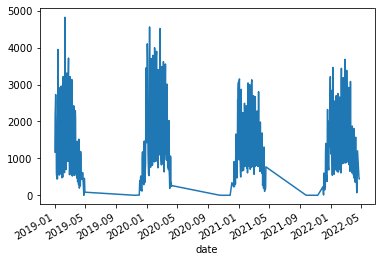

In [6]:
NOV=df['Number of visitor']
NOV.plot()

In [7]:
def df_to_X_y(df, window_size=8):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [8]:
WINDOW_SIZE=8
X,y=df_to_X_y(NOV, WINDOW_SIZE)
X.shape, y.shape

((519, 8, 1), (519,))

In [9]:
X_train, y_train = X[:400], y[:400]
X_val, y_val=X[400:490],y[400:490]
X_test, y_test=X[490:527],y[490:527]
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((400, 8, 1), (400,), (90, 8, 1), (90,))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((8, 1)))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(36))
model.add(Dropout(0.2))
model.add(Dense(80, 'relu'))
model.add(Dense(1, 'relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8, 100)            40800     
                                                                 
 dropout (Dropout)           (None, 8, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 8, 50)             30200     
                                                                 
 dropout_1 (Dropout)         (None, 8, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 36)                12528     
                                                                 
 dropout_2 (Dropout)         (None, 36)                0         
                                                                 
 dense (Dense)               (None, 80)                2

In [11]:
cp1 = ModelCheckpoint('model.hdf5', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [12]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, callbacks=[cp1])

Epoch 1/30
13/13 [==============================] - 8s 139ms/step - loss: 2542737.0000 - root_mean_squared_error: 1594.5962 - val_loss: 3129131.7500 - val_root_mean_squared_error: 1768.9352
Epoch 2/30
13/13 [==============================] - 0s 21ms/step - loss: 2387821.5000 - root_mean_squared_error: 1545.2577 - val_loss: 2834877.7500 - val_root_mean_squared_error: 1683.7095
Epoch 3/30
13/13 [==============================] - 0s 23ms/step - loss: 2100270.5000 - root_mean_squared_error: 1449.2310 - val_loss: 2358352.2500 - val_root_mean_squared_error: 1535.6927
Epoch 4/30
13/13 [==============================] - 0s 23ms/step - loss: 1726577.5000 - root_mean_squared_error: 1313.9929 - val_loss: 1783503.6250 - val_root_mean_squared_error: 1335.4788
Epoch 5/30
13/13 [==============================] - 0s 22ms/step - loss: 1356676.7500 - root_mean_squared_error: 1164.7646 - val_loss: 1289613.1250 - val_root_mean_squared_error: 1135.6113
Epoch 6/30
13/13 [==============================] - 0s

In [13]:
model.evaluate(X_train, y_train)

13/13 [==============================] - 0s 6ms/step - loss: 841926.5000 - root_mean_squared_error: 917.5656


[841926.5, 917.5655517578125]

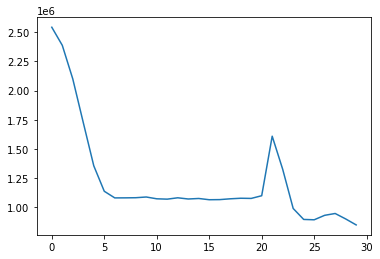

In [14]:
import matplotlib.pyplot as plt
loss_per_epoch = history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [358]:
from tensorflow.keras.models import load_model
model = load_model('model.hdf5')

In [359]:
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

13/13 [==============================] - 1s 10ms/step


,Train Predictions,Actuals
0,1368.361816,443
1,1603.317261,554
2,1937.212280,450
3,2015.706421,2442
4,2652.013184,3948
...,...,...
395,380.239990,378
396,1441.011353,1591
397,2555.450684,2323
398,991.952698,748


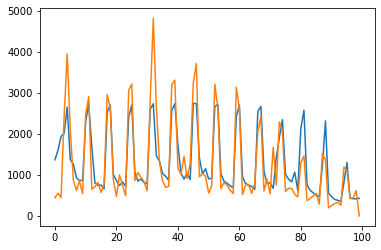

In [360]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])

In [361]:
train_predictions = model.predict(X_test).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_test})
train_results

1/1 [==============================] - 0s 24ms/step


,Train Predictions,Actuals
0,1264.087280,862
1,939.337708,697
2,862.171875,820
3,856.624695,611
4,2279.964111,1512
5,2736.280762,1877
6,1874.472778,827
7,813.829834,817
8,776.089966,948
9,790.975342,609


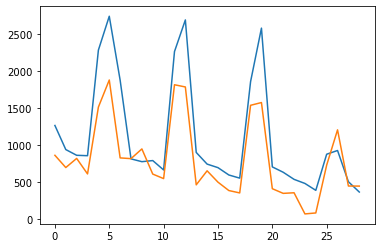

In [362]:
plt.plot(train_results['Train Predictions'][:200])
plt.plot(train_results['Actuals'][:200])